In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train = pd.read_csv('train_qWM28Yl.csv')
test = pd.read_csv('test_zo1G9sv.csv')

In [6]:
train.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
train.shape

(58592, 44)

In [8]:
test.shape

(39063, 43)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [11]:
train.isnull().sum()/len(train)

policy_id                           0.0
policy_tenure                       0.0
age_of_car                          0.0
age_of_policyholder                 0.0
area_cluster                        0.0
population_density                  0.0
make                                0.0
segment                             0.0
model                               0.0
fuel_type                           0.0
max_torque                          0.0
max_power                           0.0
engine_type                         0.0
airbags                             0.0
is_esc                              0.0
is_adjustable_steering              0.0
is_tpms                             0.0
is_parking_sensors                  0.0
is_parking_camera                   0.0
rear_brakes_type                    0.0
displacement                        0.0
cylinder                            0.0
transmission_type                   0.0
gear_box                            0.0
steering_type                       0.0


## Exploratory Data Analysis

<AxesSubplot:xlabel='is_claim', ylabel='count'>

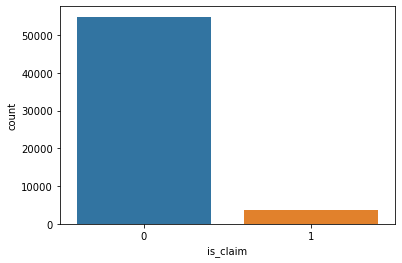

In [12]:
sns.countplot(train['is_claim'])

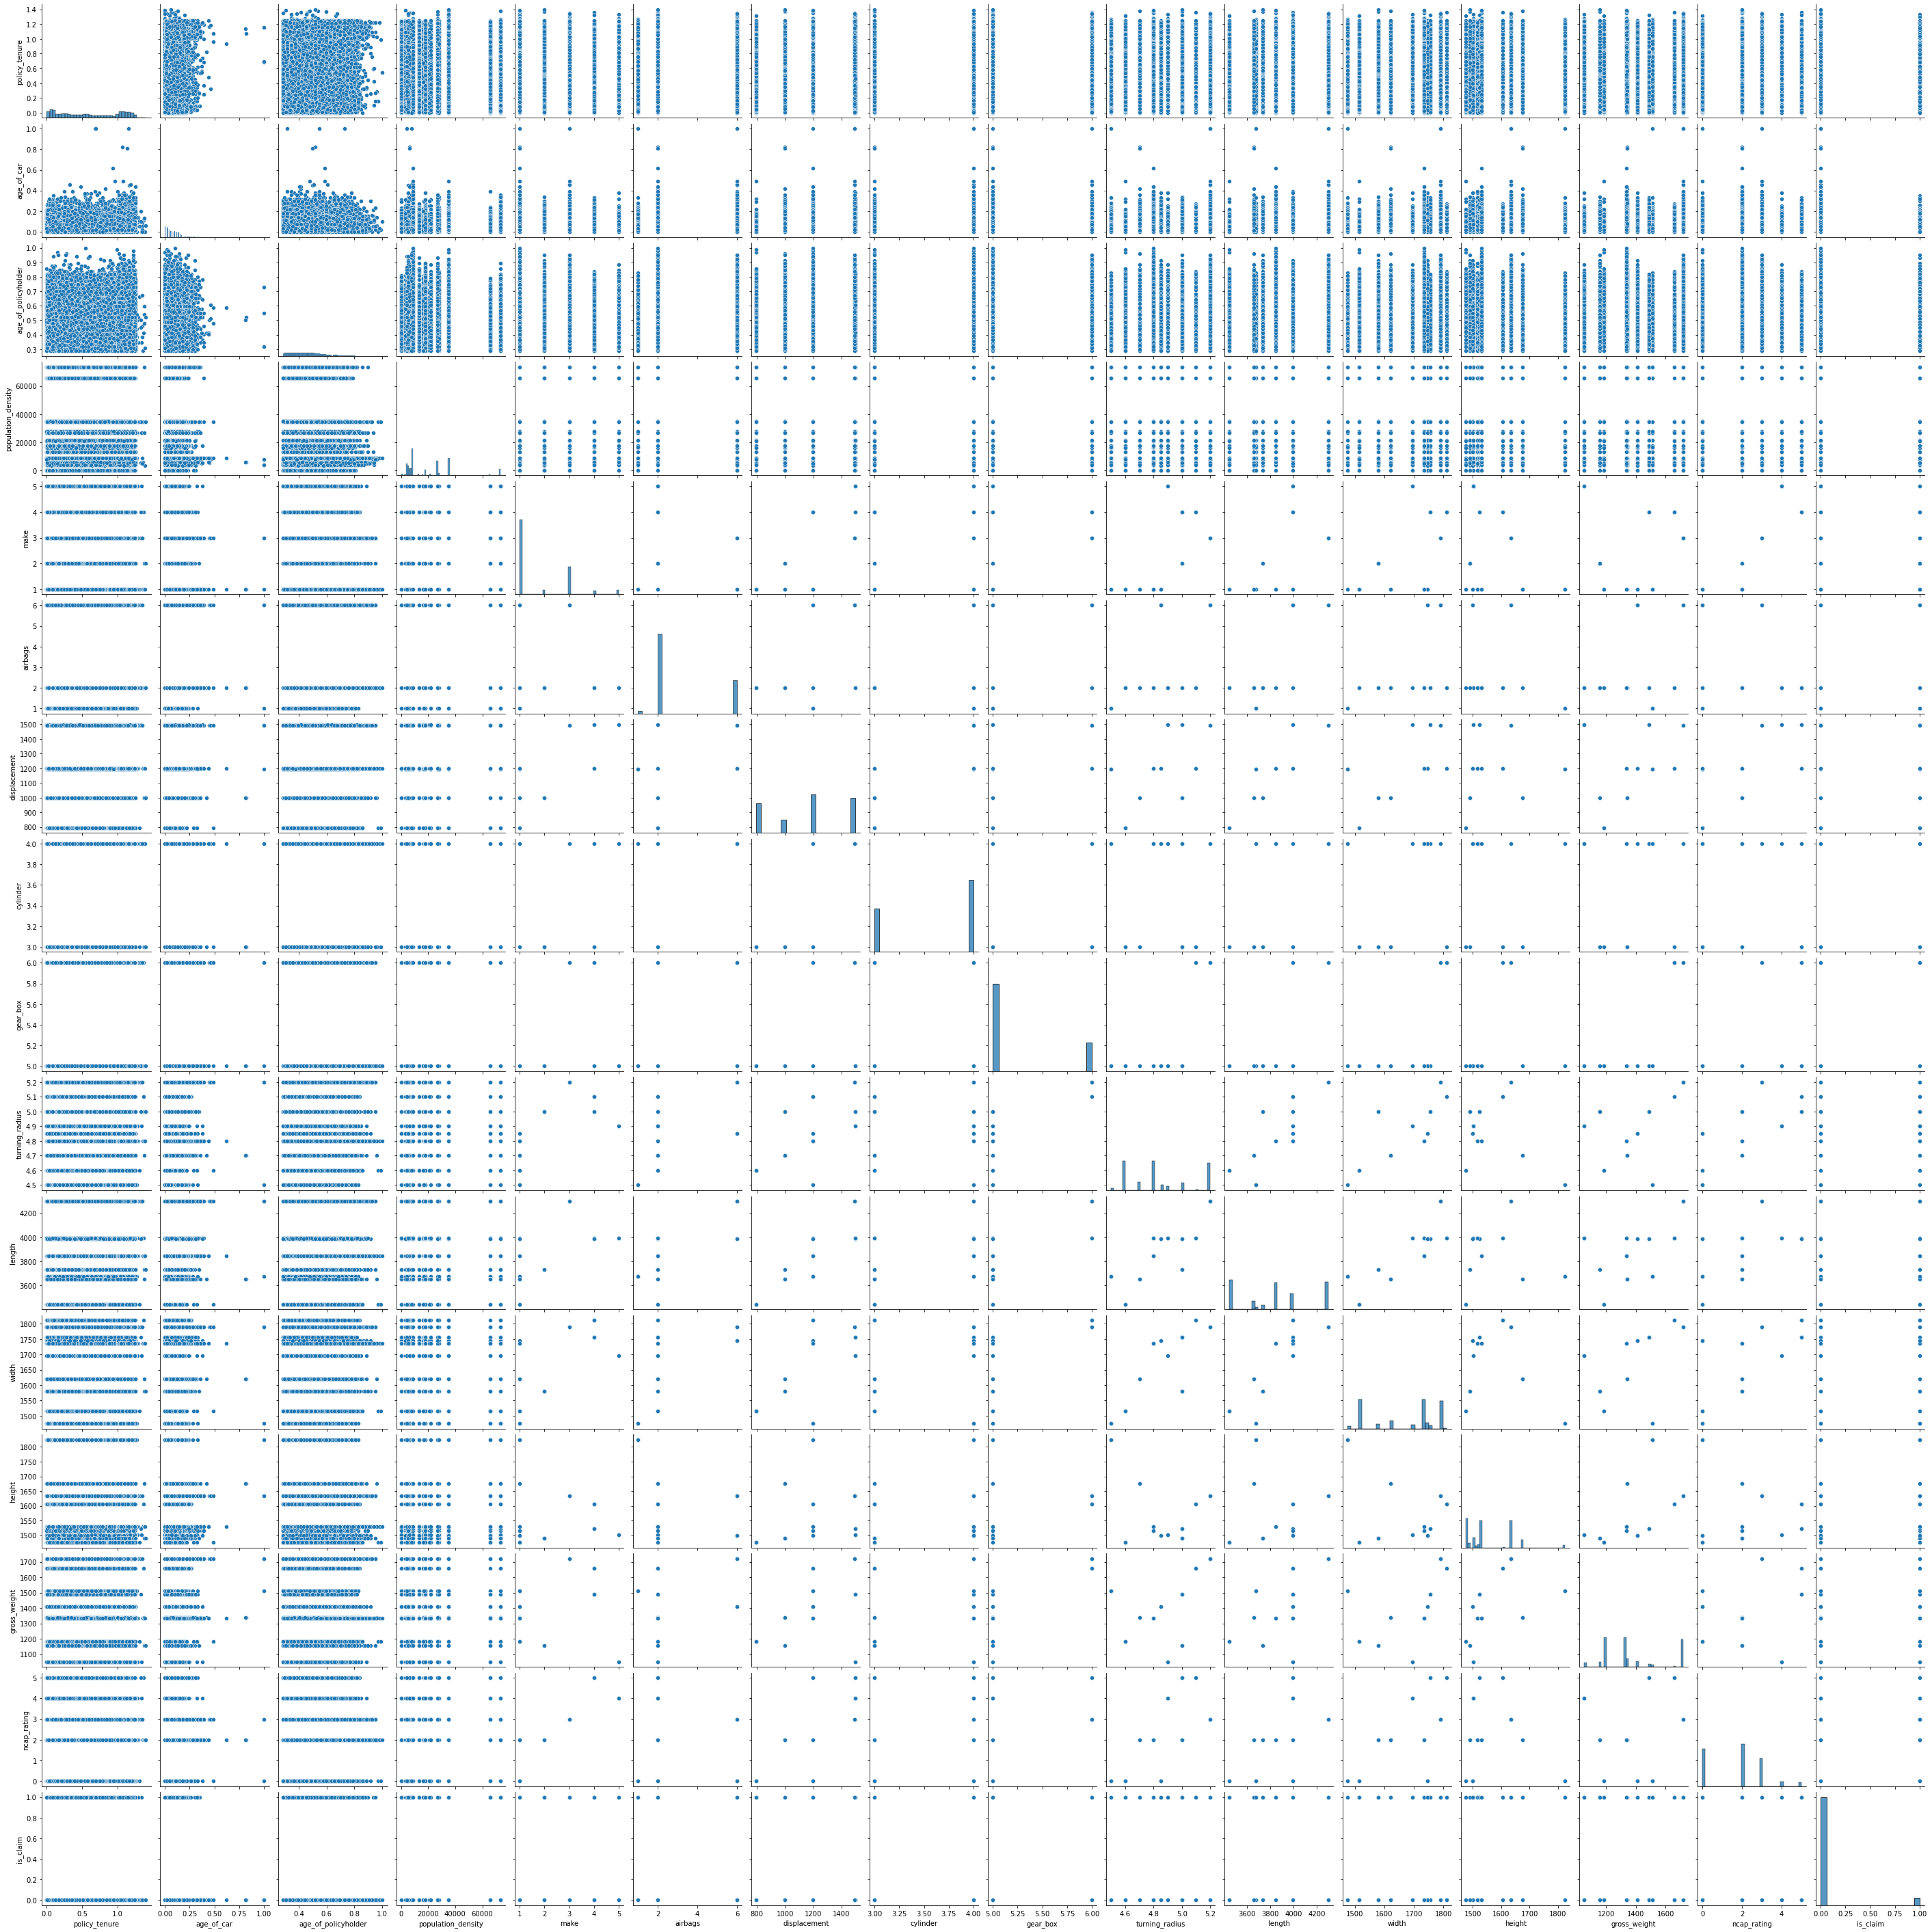

In [13]:
sns.pairplot(train)

### Balancing the dataset

In [18]:
train.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [20]:
train['area_cluster'].unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [21]:
train['segment'].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [22]:
train['model'].unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [23]:
train['fuel_type'].unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [24]:
train['max_torque'].unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [25]:
train['max_power'].unique()

array(['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm',
       '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm',
       '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm'],
      dtype=object)

In [26]:
train['engine_type'].unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [27]:
train['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
train['steering_type'].unique()

array(['Power', 'Electric', 'Manual'], dtype=object)

<AxesSubplot:>

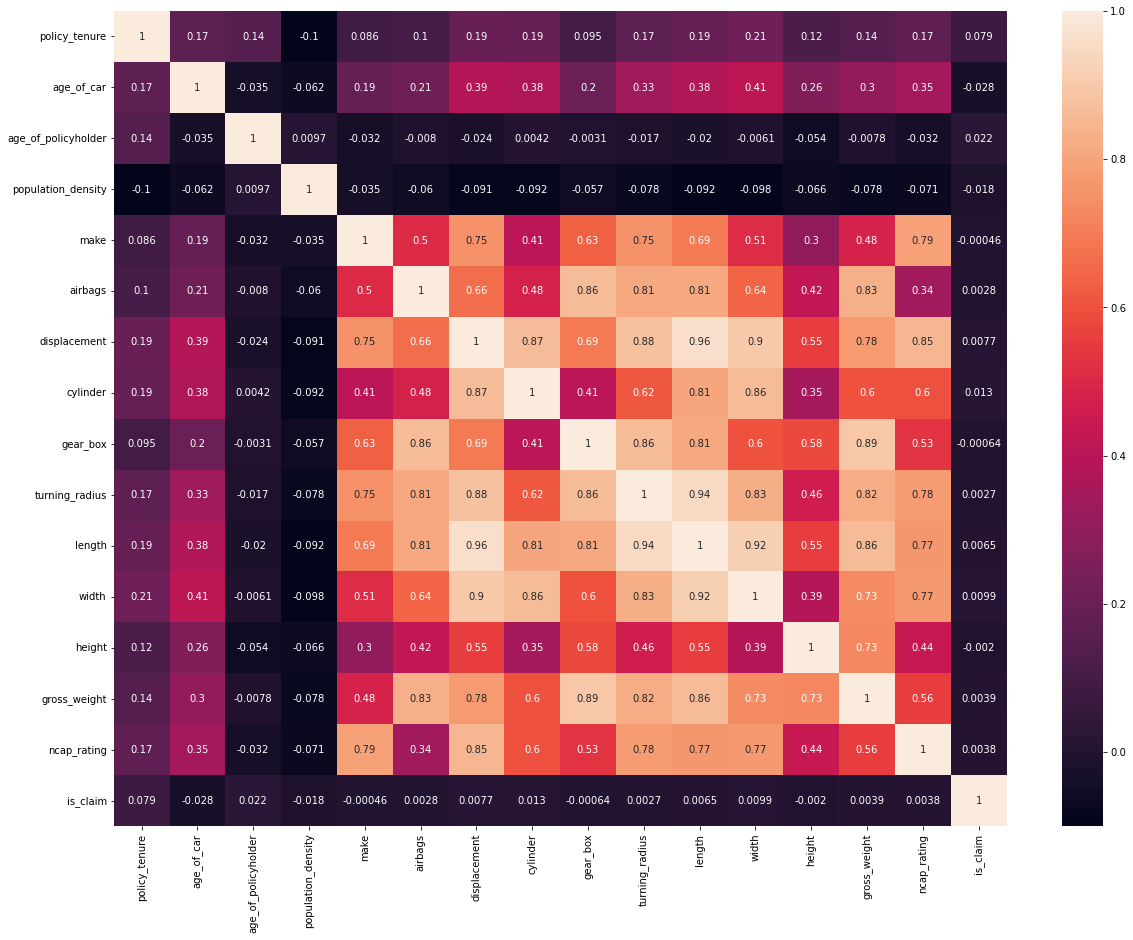

In [31]:
# Correlation
plt.figure(figsize = (20,15))
sns.heatmap(train.corr() , annot = True)

In [48]:
train1 = train.copy()

In [49]:
train1.drop(['length'], axis =1, inplace = True)

<AxesSubplot:>

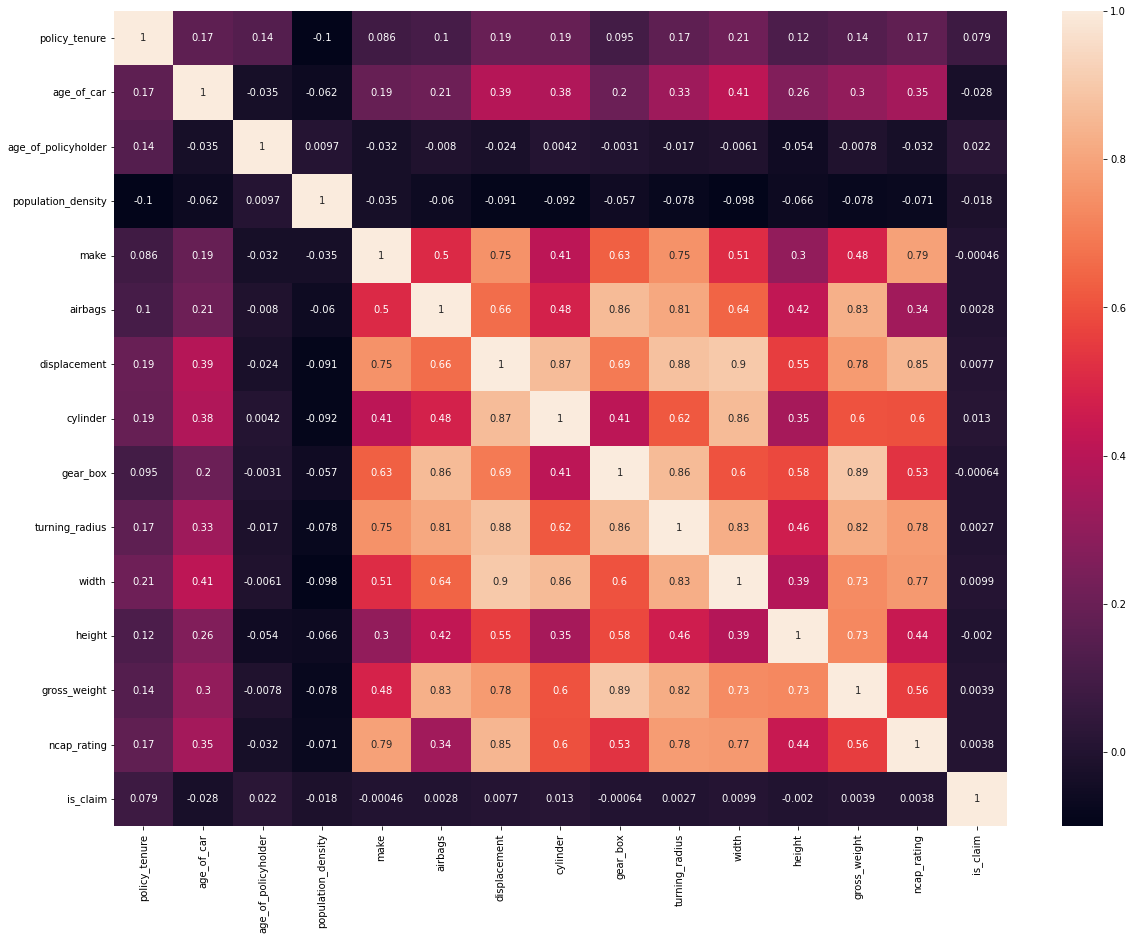

In [50]:
# Correlation
plt.figure(figsize = (20,15))
sns.heatmap(train1.corr() , annot = True)

In [51]:
train1.drop(['gear_box','turning_radius'], axis =1, inplace = True)

<AxesSubplot:>

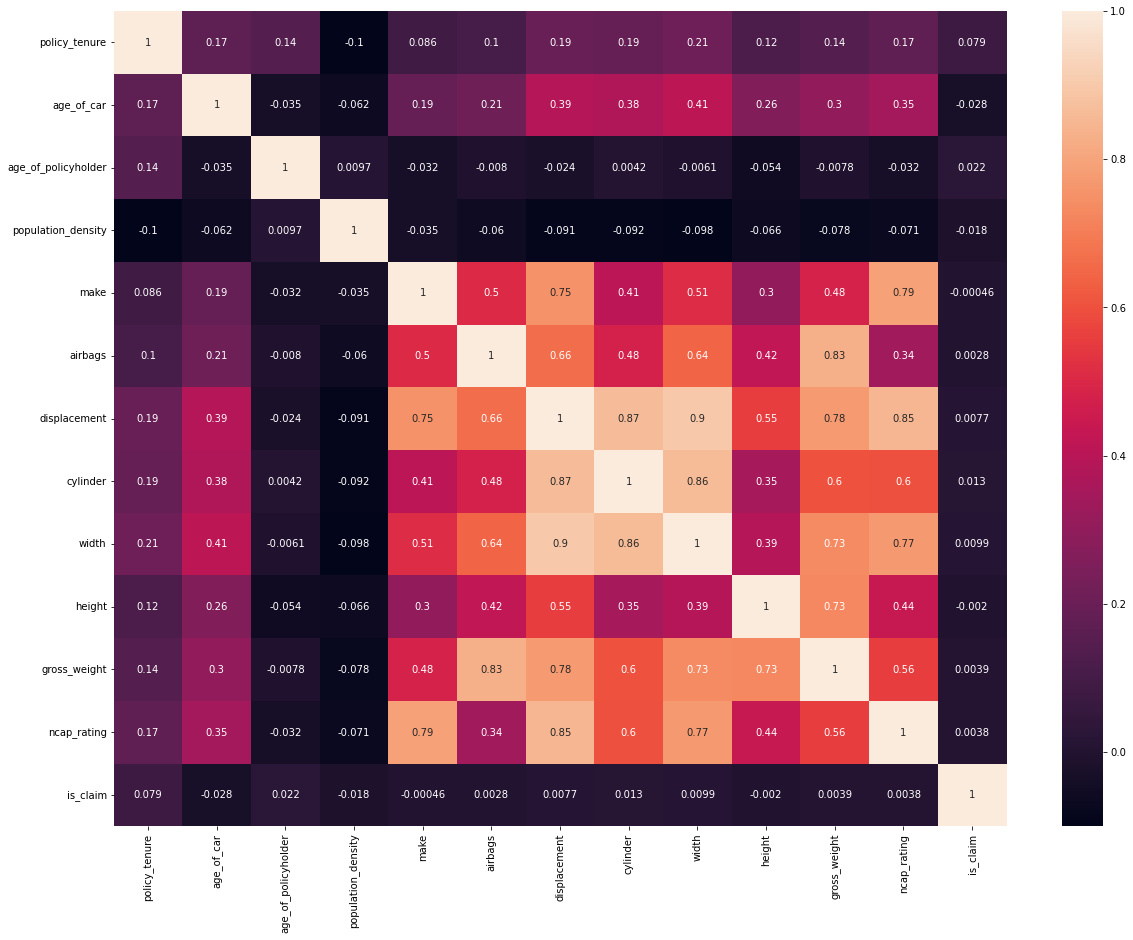

In [52]:
# Correlation
plt.figure(figsize = (20,15))
sns.heatmap(train1.corr() , annot = True)

In [53]:
train1.drop(['cylinder','width'], axis =1, inplace = True)

<AxesSubplot:>

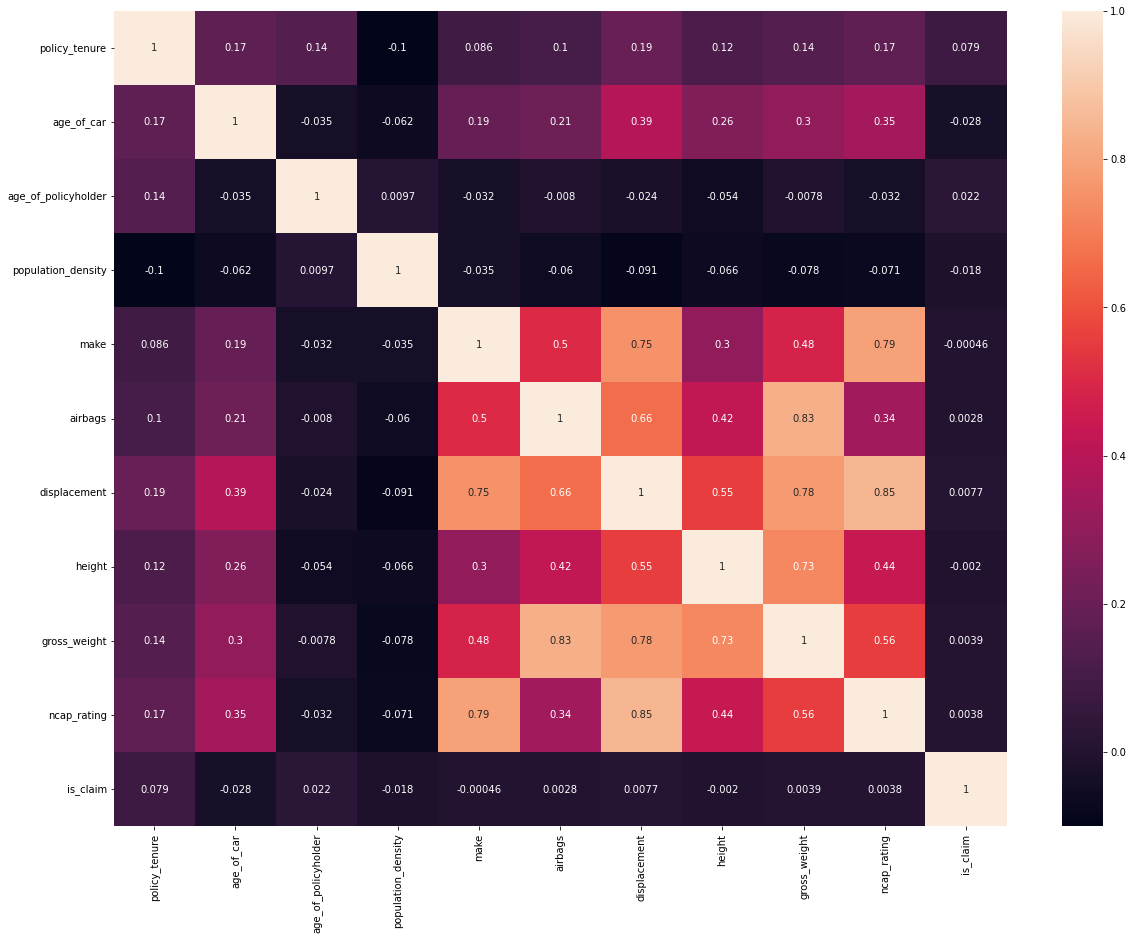

In [54]:
# Correlation
plt.figure(figsize = (20,15))
sns.heatmap(train1.corr() , annot = True)

In [55]:
train1.drop(['ncap_rating','gross_weight'], axis =1, inplace = True)

<AxesSubplot:>

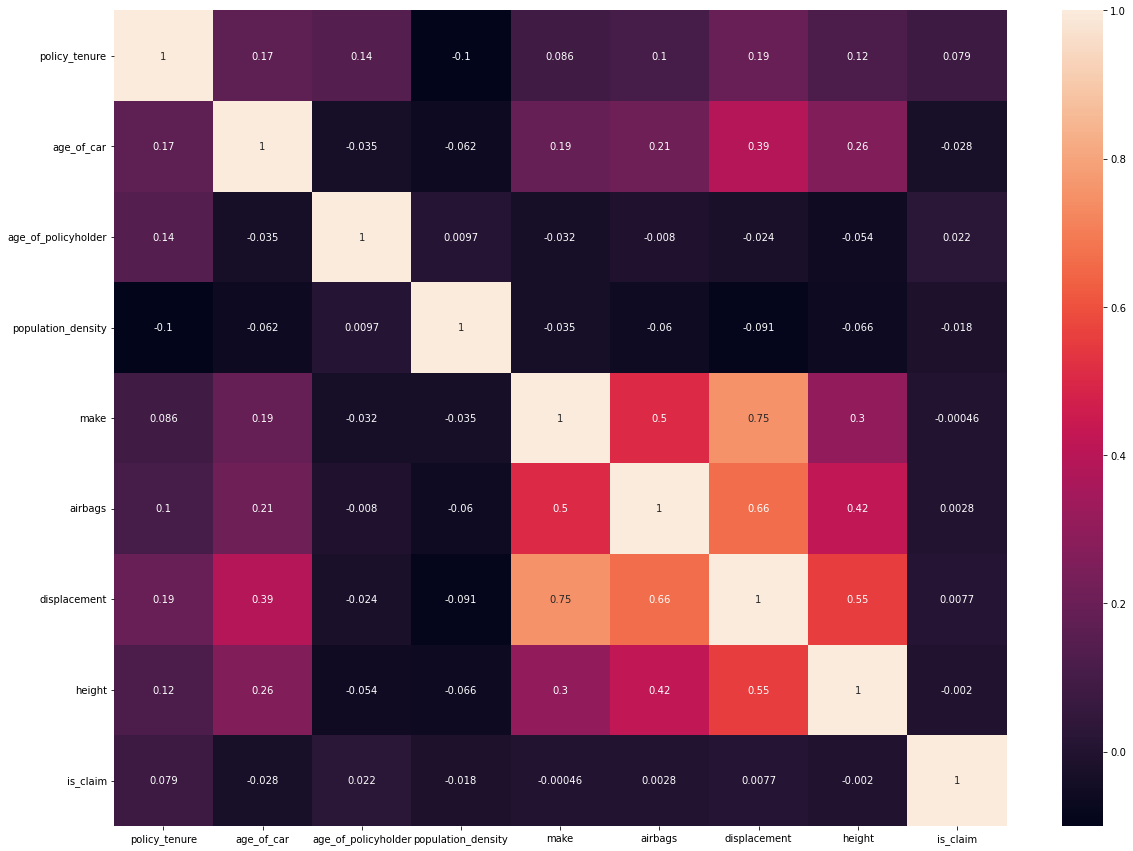

In [56]:
# Correlation
plt.figure(figsize = (20,15))
sns.heatmap(train1.corr() , annot = True)

In [41]:
test1 = test.copy()

In [42]:
test1.drop(['length','gear_box','turning_radius','cylinder','width','ncap_rating','gross_weight'], axis =1, inplace = True)

<AxesSubplot:>

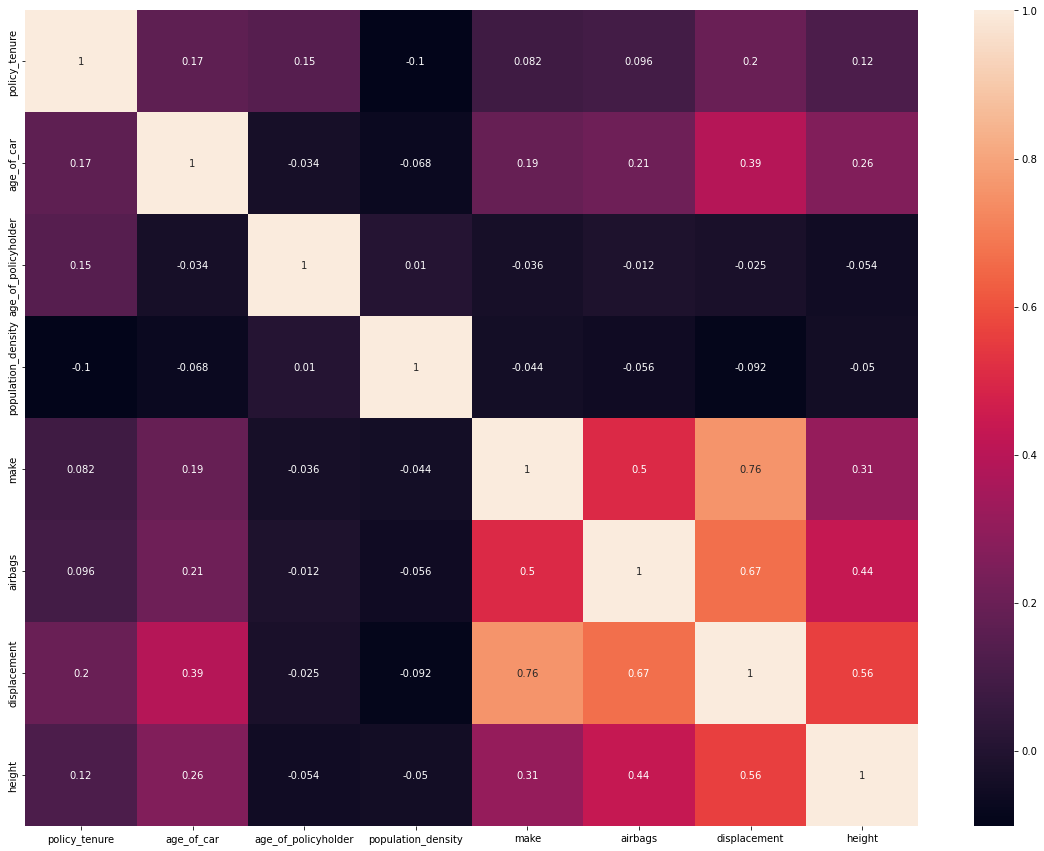

In [43]:
# Correlation
plt.figure(figsize = (20,15))
sns.heatmap(test1.corr() , annot = True)

In [44]:
train1.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement',
       'transmission_type', 'steering_type', 'height', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

<AxesSubplot:xlabel='model', ylabel='age_of_car'>

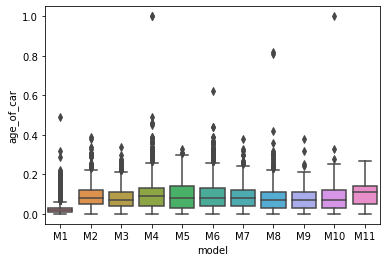

In [59]:
sns.boxplot(x = 'model', y = 'age_of_car', data = train1)

<AxesSubplot:title={'center':'is_claim'}, xlabel='model'>

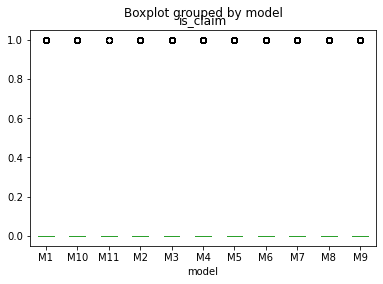

In [58]:
train1.boxplot(by ='model', column =['is_claim'], grid = False)

<AxesSubplot:xlabel='policy_tenure', ylabel='age_of_car'>

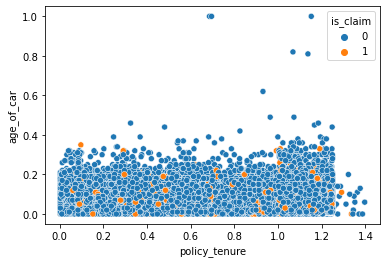

In [61]:
sns.scatterplot(x = 'policy_tenure', y = 'age_of_car', data = train1, hue = 'is_claim')

### As we will be applying tree based classifier, we are not performing any outlier treatment

In [63]:
train1.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
transmission_type                    object
steering_type                   

<AxesSubplot:xlabel='segment', ylabel='count'>

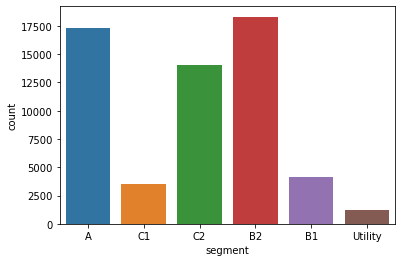

In [64]:
sns.countplot(train['segment'])

<AxesSubplot:xlabel='segment', ylabel='is_claim'>

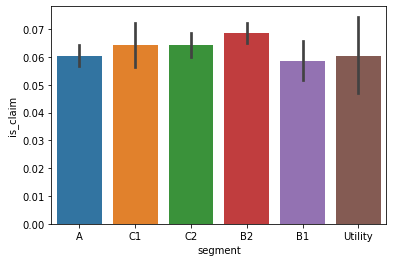

In [65]:
sns.barplot(train1['segment'], train1['is_claim'])

#### Claim seems to be equally done by all segments

<AxesSubplot:xlabel='model', ylabel='is_claim'>

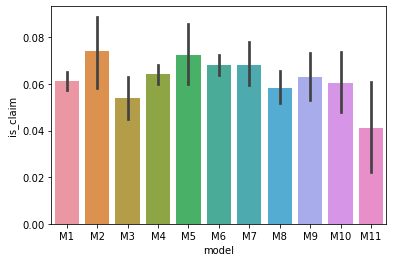

In [66]:
sns.barplot(train1['model'], train1['is_claim'])

<AxesSubplot:xlabel='fuel_type', ylabel='is_claim'>

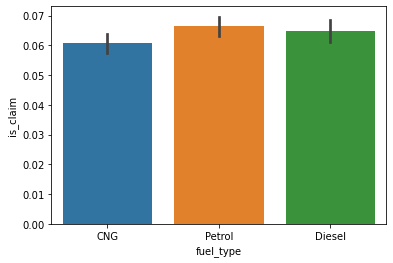

In [67]:
sns.barplot(train1['fuel_type'], train1['is_claim'])

<AxesSubplot:xlabel='engine_type', ylabel='is_claim'>

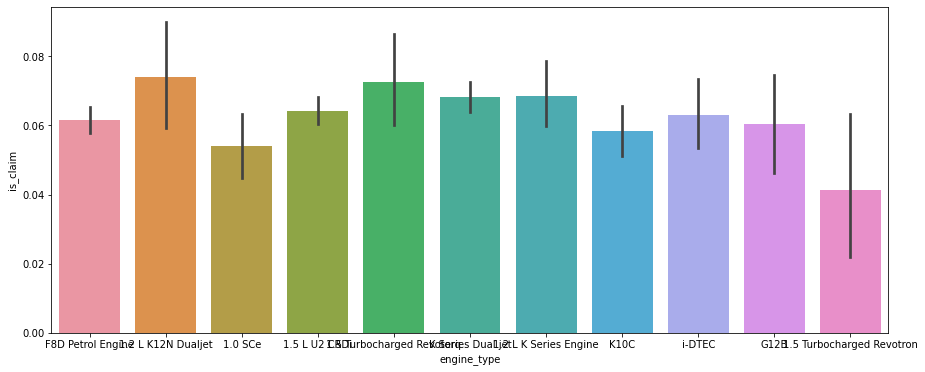

In [69]:
plt.figure(figsize = (15,6))
sns.barplot(train1['engine_type'], train1['is_claim'])

<AxesSubplot:xlabel='steering_type', ylabel='is_claim'>

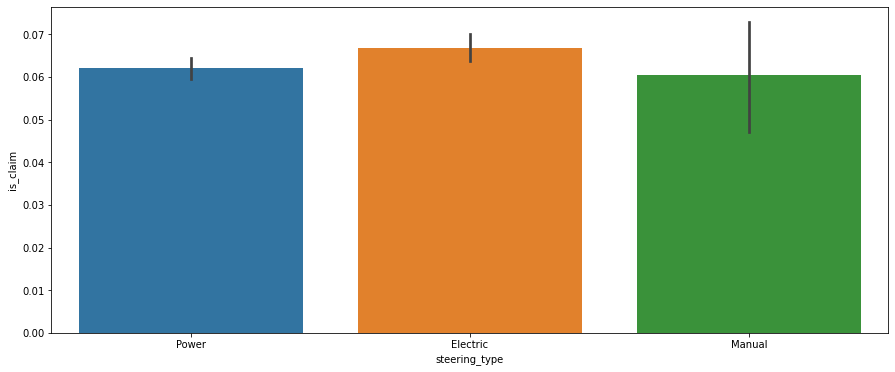

In [70]:
plt.figure(figsize = (15,6))
sns.barplot(train1['steering_type'], train1['is_claim'])

<AxesSubplot:xlabel='is_parking_sensors', ylabel='is_claim'>

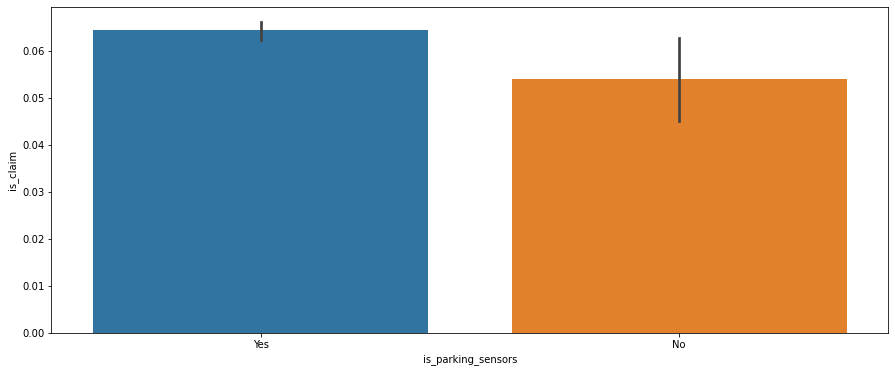

In [71]:
plt.figure(figsize = (15,6))
sns.barplot(train1['is_parking_sensors'], train1['is_claim'])

## Encoding

In [73]:
numeric_train = train1.select_dtypes(include=['int','float'])
categorical_train = train1.select_dtypes(exclude=['int','float'])


In [74]:
numeric_train.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'height',
       'is_claim'],
      dtype='object')

In [109]:
numeric_train.shape

(58592, 9)

In [75]:
categorical_train.columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [77]:
categorical_train.drop('policy_id', inplace = True, axis = 1)

In [88]:
# get_dummies for categorical columns
cat_dummy = pd.get_dummies(categorical_train , drop_first = True)

In [89]:
cat_dummy.shape

(58592, 85)

In [91]:
cat_dummy.columns

Index(['area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3',
       'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6',
       'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B1',
       'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility',
       'model_M10', 'model_M11', 'model_M2', 'model_M3', 'model_M4',
       'model_M5', 'model_M6', 'model_M7', 'model_M8', 'model_M9',
       'fuel_type_Diesel', 'fuel_type_Petrol', 'max_torque_170Nm@4000rpm',
       'max_torque_200Nm@1750rpm', 'max_torque_200Nm@3000rpm',
       'max_torque_250Nm@2750rpm', 'max_torque_60Nm@3500rpm',
       'max_torque_82.1Nm@3400rpm', 'max_torque_85Nm@3000rpm',
       'max_torque_91Nm@4250rpm', 'max_power_118.36bhp@550

In [92]:
# Dropping duplicate columns
cat_dummy1 = cat_dummy.loc[:,~cat_dummy.T.duplicated(keep='first')]

In [93]:
cat_dummy1.shape

(58592, 53)

In [94]:
# For Test data

In [95]:
numeric_test = test1.select_dtypes(include=['int','float'])
categorical_test = test1.select_dtypes(exclude=['int','float'])


In [108]:
numeric_test.shape

(39063, 8)

In [96]:
categorical_test.drop('policy_id', inplace = True, axis = 1)

In [97]:
# get_dummies for categorical columns
cat_dummy_test = pd.get_dummies(categorical_test , drop_first = True)

In [98]:
cat_dummy_test.shape

(39063, 85)

In [99]:
# Dropping duplicate columns
cat_dummy_test1 = cat_dummy_test.loc[:,~cat_dummy_test.T.duplicated(keep='first')]

In [100]:
cat_dummy_test1.shape

(39063, 53)

In [101]:
# Concatenating numerical and categorical columns

In [103]:
train_final = pd.concat([numeric_train,cat_dummy1] , axis = 1)

In [104]:
train_final.shape

(58592, 62)

In [113]:
# Finding correlation

<AxesSubplot:>

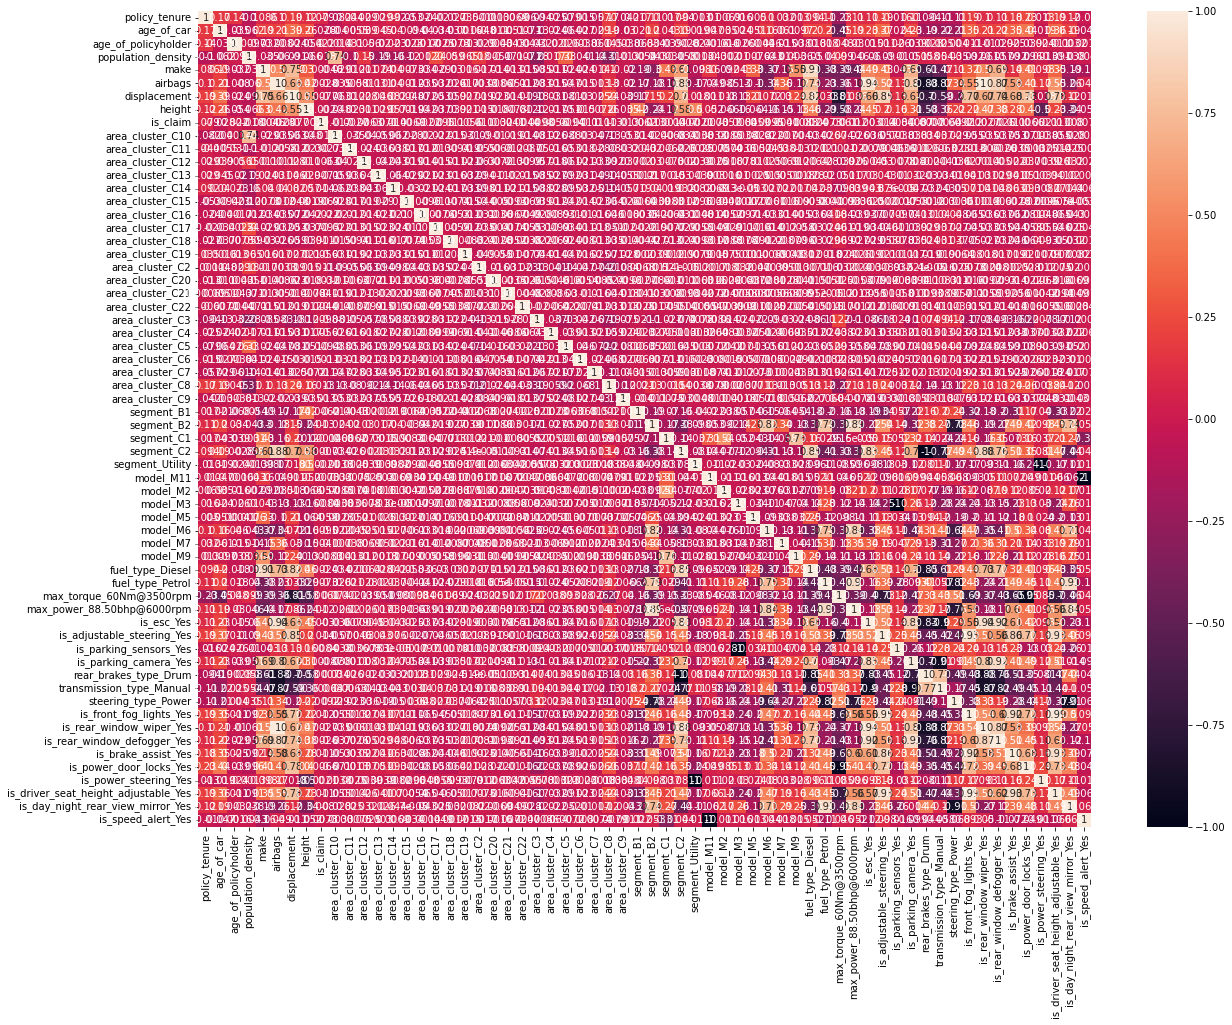

In [114]:
plt.figure(figsize = (20,15))
sns.heatmap(train_final.corr() , annot = True)

In [125]:
train_final.corr()

policy_tenure  age_of_car  \
policy_tenure                              1.000000    0.166312   
age_of_car                                 0.166312    1.000000   
age_of_policyholder                        0.143676   -0.035427   
population_density                        -0.100307   -0.062255   
make                                       0.086101    0.188122   
airbags                                    0.103981    0.209073   
displacement                               0.194361    0.393208   
height                                     0.119055    0.259156   
is_claim                                   0.078747   -0.028172   
area_cluster_C10                          -0.082296   -0.039942   
area_cluster_C11                           0.043507   -0.005521   
area_cluster_C12                           0.028701    0.038913   
area_cluster_C13                           0.028617    0.044894   
area_cluster_C14                           0.092209    0.039850   
area_cluster_C15                          -0.052624   -0.009415   
area_cluster_C16                          -0.023716   -0.039778   
area_cluster_C17                          -0.019911   -0.033953   
area_cluster_C18                          -0.026725   -0.037443   
area_cluster_C19                           0.034714    0.001592   
area_cluster_C2                           -0.001104    0.004800   
area_cluster_C20                          -0.012573   -0.011362   
area_cluster_C21                           0.000687    0.005061   
area_cluster_C22                           0.005959   -0.007053   
area_cluster_C3                           -0.094329   -0.131191   
area_cluster_C4                           -0.025108   -0.023909   
area_cluster_C5                           -0.079354   -0.064392   
area_cluster_C6                           -0.014721   -0.026784   
area_cluster_C7                           -0.056870   -0.029195   
area_cluster_C8                            0.174079    0.188086   
area_cluster_C9                           -0.042181   -0.029524   
segment_B1                                 0.016512    0.020550   
segment_B2                                 0.109498    0.196803   
segment_C1                                 0.017218    0.042679   
segment_C2                                 0.094240    0.194777   
segment_Utility                           -0.012695    0.018853   
model_M11                                  0.010318    0.046551   
model_M2                                   0.006948    0.035194   
model_M3                                   0.016007    0.023809   
model_M5                                   0.004974    0.050805   
model_M6                                   0.101311    0.164098   
model_M7                                   0.031989    0.061203   
model_M9                                   0.012694    0.009678   
fuel_type_Diesel                           0.094437    0.202830   
fuel_type_Petrol                           0.114957    0.201279   
max_torque_60Nm@3500rpm                   -0.230935   -0.452306   
max_power_88.50bhp@6000rpm                 0.110643    0.190674   
is_esc_Yes                                 0.105427    0.225892   
is_adjustable_steering_Yes                 0.192941    0.370190   
is_parking_sensors_Yes                    -0.016007   -0.023809   
is_parking_camera_Yes                      0.111614    0.228212   
rear_brakes_type_Drum                     -0.094240   -0.194777   
transmission_type_Manual                  -0.107626   -0.222238   
steering_type_Power                       -0.111979   -0.212478   
is_front_fog_lights_Yes                    0.189288    0.349570   
is_rear_window_wiper_Yes                   0.104055    0.212699   
is_rear_window_defogger_Yes                0.107545    0.223579   
is_brake_assist_Yes                        0.184687    0.350568   
is_power_door_locks_Yes                    0.229307    0.435211   
is_power_steering_Yes                      0.012695   -0.018853   
is_driver_seat_hei

In [116]:
corr = train_final.corr()

In [117]:
corr.loc[np.where(corr>0.8, 1, 0)==1].columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'height',
       'is_claim', 'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3',
       'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6',
       'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B1',
       'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility',
       'model_M11', 'model_M2', 'model_M3', 'model_M5', 'model_M6', 'model_M7',
       'model_M9', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'max_torque_60Nm@3500rpm', 'max_power_88.50bhp@6000rpm', 'is_esc_Yes',
       'is_adjustable_steering_Yes', 'is_parking_sensors_Yes',
       'is_parking_camera_Yes'

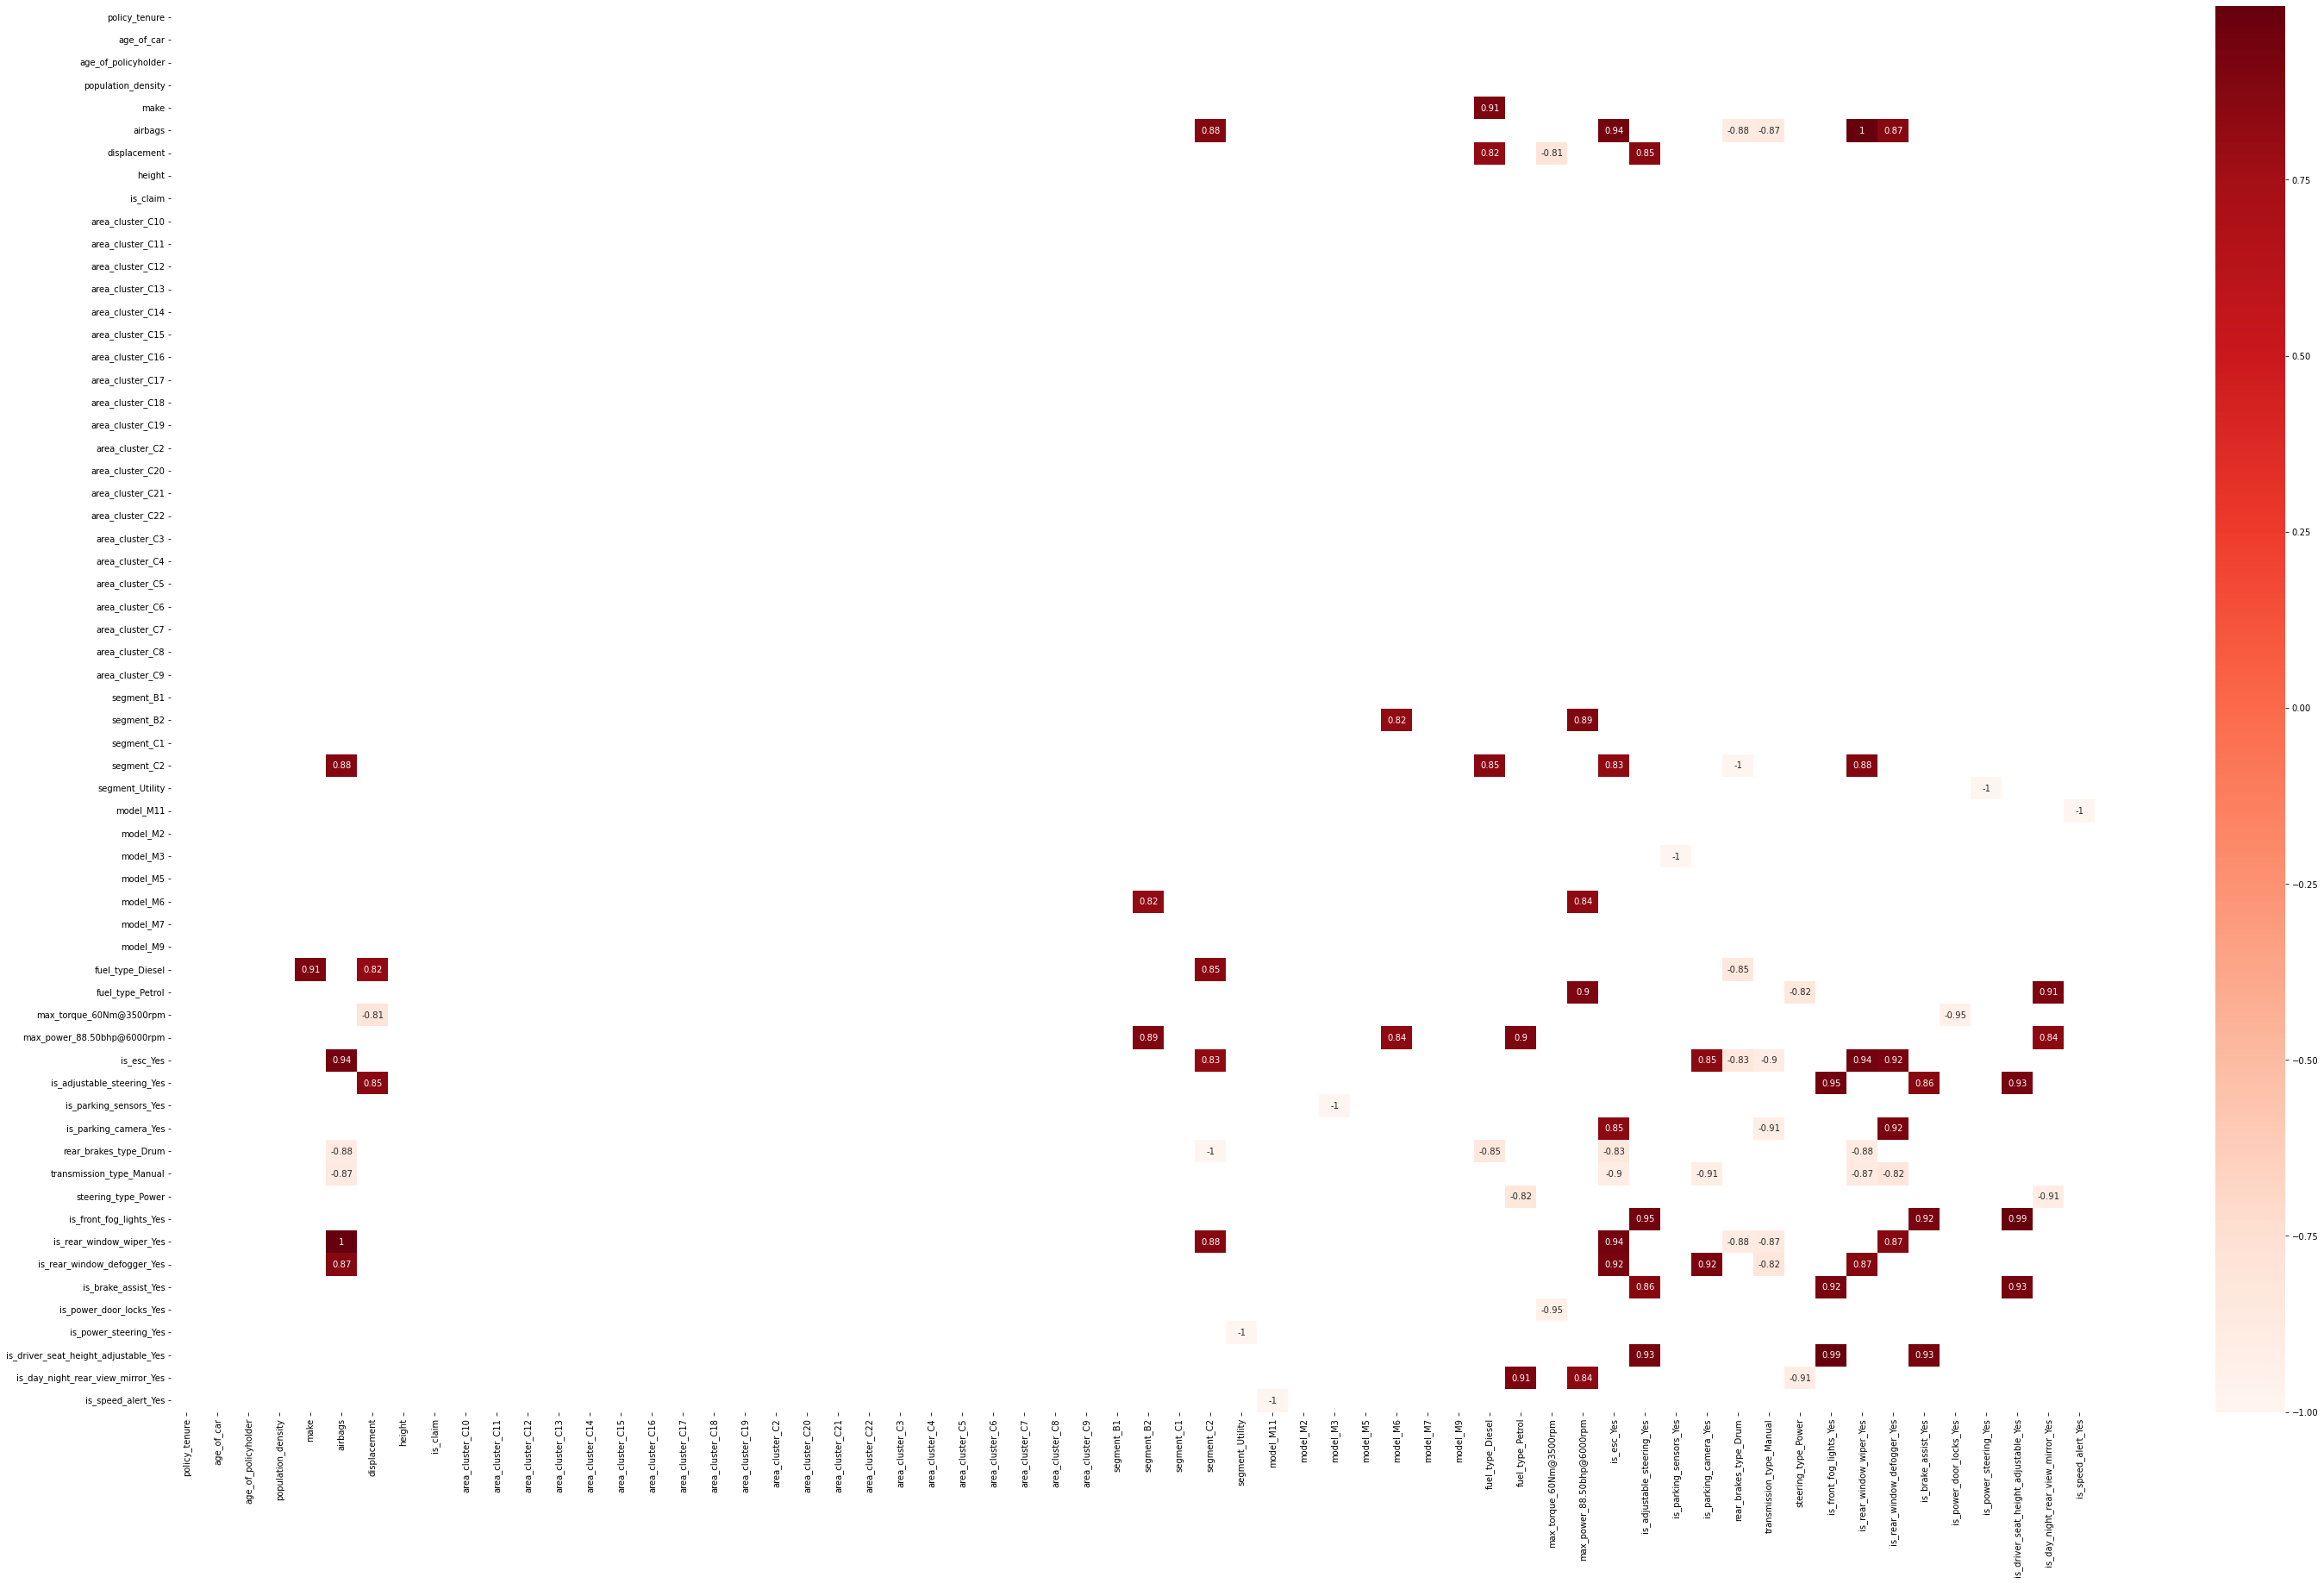

In [119]:
dfCorr = train_final.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
plt.figure(figsize=(50,30))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()


In [124]:
xFlattened = []
dfCorr = train_final.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
xFlattened = xFiltered.unstack().sort_values().drop_duplicates()

NameError: name 'xFiltered' is not defined

In [122]:
# Returns correlation matrix
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

# flattens correlation matrix with bounds
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

# Returns correlation for a variable from flattened correlation matrix
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

In [123]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(train_final, .8)

is_speed_alert_Yes                    model_M11                              -1.000000
is_power_steering_Yes                 segment_Utility                        -1.000000
is_parking_sensors_Yes                model_M3                               -1.000000
rear_brakes_type_Drum                 segment_C2                             -1.000000
max_torque_60Nm@3500rpm               is_power_door_locks_Yes                -0.948443
is_parking_camera_Yes                 transmission_type_Manual               -0.913194
is_day_night_rear_view_mirror_Yes     steering_type_Power                    -0.905242
is_esc_Yes                            transmission_type_Manual               -0.897423
rear_brakes_type_Drum                 is_rear_window_wiper_Yes               -0.878697
airbags                               rear_brakes_type_Drum                  -0.876072
is_rear_window_wiper_Yes              transmission_type_Manual               -0.872880
airbags                               trans

In [126]:
train_final1 = train_final.copy()

In [127]:
train_final1.drop(['is_speed_alert_Yes','is_power_steering_Yes','is_parking_sensors_Yes','is_power_door_locks_Yes','is_parking_camera_Yes'],\
                 axis = 1, inplace = True)

In [128]:
train_final1.drop(['is_day_night_rear_view_mirror_Yes','is_esc_Yes','segment_C2','is_rear_window_wiper_Yes','airbags'],\
                 axis = 1, inplace = True)

In [129]:
train_final1.drop(['steering_type_Power','is_rear_window_defogger_Yes','fuel_type_Diesel','model_M6'],\
                 axis = 1, inplace = True)

In [130]:
train_final1.drop(['max_torque_60Nm@3500rpm','segment_B2','is_brake_assist_Yes','fuel_type_Petrol','is_driver_seat_height_adjustable_Yes',
                  'is_front_fog_lights_Yes'], axis = 1, inplace = True)
                

In [131]:
train_final1.shape

(58592, 42)

In [132]:
corrFilter(train_final1, .8)

displacement   is_adjustable_steering_Yes    0.852116
policy_tenure  policy_tenure                      NaN
dtype: float64

In [134]:
train_final1.drop('is_adjustable_steering_Yes', axis = 1, inplace = True)

In [135]:
train_final1.shape

(58592, 41)

In [244]:
test_final1.shape

(39063, 40)

In [105]:
# Test dataset

In [106]:
test_final = pd.concat([numeric_test,cat_dummy_test1] , axis = 1)

In [107]:
test_final.shape

(39063, 61)

## Balancing the Dataset using SMOTE technique

In [137]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(train_final1.drop('is_claim', axis=1), train_final['is_claim'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [138]:
oversampled.shape

(109688, 41)

In [139]:
oversampled['is_claim'].value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

In [140]:
oversampled_X.shape

(109688, 40)

In [141]:
oversampled_Y.shape

(109688,)

## Train Test split using stratified sampling

In [142]:
X = oversampled_X
y = oversampled_Y

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

## Model Building

### Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [145]:
pred_lr = lr.predict(X_test)

In [146]:
from sklearn.metrics import f1_score


In [147]:
f1_score(y_test , pred_lr)

0.5581349402351082

In [151]:
f1_score(y_train , lr.predict(X_train))

0.5579280651204576

### Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [150]:
pred_rf = rf.predict(X_test)
f1_score(y_test , pred_rf)

0.9080135847965893

In [153]:
f1_score(y_train , rf.predict(X_train))

0.9999878441621589

In [154]:
rf.feature_importances_

array([0.29413924, 0.31995701, 0.26657451, 0.02315133, 0.00429575,
       0.0111564 , 0.01370145, 0.00182873, 0.0021289 , 0.00193644,
       0.0030828 , 0.0032474 , 0.0012423 , 0.00135027, 0.00095597,
       0.00109435, 0.00232962, 0.00413139, 0.00054931, 0.00106803,
       0.00073673, 0.00342916, 0.00148671, 0.00322256, 0.00213457,
       0.00289209, 0.00508172, 0.00307452, 0.00215847, 0.00186597,
       0.00124904, 0.00068401, 0.00095869, 0.0010077 , 0.00139354,
       0.00172141, 0.00079842, 0.00281161, 0.00162858, 0.00374329])

## KNN Classifier

In [175]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
k_clf = KNeighborsClassifier(n_jobs=-1)

In [177]:
k_clf.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [178]:
pred_k = k_clf.predict(X_test)
f1_score(y_test , pred_k)

0.8265135356849876

## SVM

In [179]:
from sklearn.linear_model import SGDClassifier
svmc = SGDClassifier()
svmc.fit(X_train,y_train)

SGDClassifier()

In [180]:
pred_svmc = svmc.predict(X_test)
f1_score(y_test , pred_svmc)

0.0

### Gradient Boost Classifier

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

In [182]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [188]:
pred_gb = gbc.predict(X_test)
f1_score(y_test , pred_gb)

0.8941701276726658

In [189]:
f1_score(y_train , gbc.predict(X_train))

0.895973971076127

In [190]:
from sklearn.metrics import confusion_matrix, classification_report

In [191]:
confusion_matrix(y_test , pred_gb)

array([[13044,   667],
       [ 2085, 11626]], dtype=int64)

In [192]:
print(classification_report(y_test , pred_gb))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     13711
           1       0.95      0.85      0.89     13711

    accuracy                           0.90     27422
   macro avg       0.90      0.90      0.90     27422
weighted avg       0.90      0.90      0.90     27422



## XGBoost Classifier

In [194]:
from xgboost import XGBClassifier

In [195]:
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

XGBClassifier()

In [196]:
pred_xgbc = xgbc.predict(X_test)
f1_score(y_test , pred_xgbc)

0.8987434192829421

In [197]:
f1_score(y_train , xgbc.predict(X_train))

0.9000627248172659

In [198]:
confusion_matrix(y_test , pred_xgbc)

array([[13093,   618],
       [ 2017, 11694]], dtype=int64)

In [199]:
print(classification_report(y_test , pred_xgbc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13711
           1       0.95      0.85      0.90     13711

    accuracy                           0.90     27422
   macro avg       0.91      0.90      0.90     27422
weighted avg       0.91      0.90      0.90     27422



#### Dropping correlated columns from the test data

In [160]:
test_final1 = test_final.copy()

In [161]:
test_final1.drop(['is_speed_alert_Yes','is_power_steering_Yes','is_parking_sensors_Yes','is_power_door_locks_Yes','is_parking_camera_Yes'],\
                 axis = 1, inplace = True)

In [162]:
test_final1.drop(['is_day_night_rear_view_mirror_Yes','is_esc_Yes','segment_C2','is_rear_window_wiper_Yes','airbags'],\
                 axis = 1, inplace = True)

In [163]:
test_final1.drop(['steering_type_Power','is_rear_window_defogger_Yes','fuel_type_Diesel','model_M6'],\
                 axis = 1, inplace = True)

In [164]:
test_final1.drop(['max_torque_60Nm@3500rpm','segment_B2','is_brake_assist_Yes','fuel_type_Petrol','is_driver_seat_height_adjustable_Yes',
                  'is_front_fog_lights_Yes'], axis = 1, inplace = True)

In [165]:
test_final1.drop('is_adjustable_steering_Yes', axis = 1, inplace = True)

In [166]:
test_final1.shape

(39063, 40)

#### Fitting using Gradient Boosting

In [200]:
xgbc.fit(X , y)

XGBClassifier()

In [201]:
pred_xg_test = xgbc.predict(test_final1)

In [202]:
pred_xg_test.shape

(39063,)

### Submission File

In [203]:
# Submission file creation
pred_df = pd.DataFrame(pred_xg_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission2.csv',index = False)

### The score given was 0.126

## Trying with Recursive Feature Elimination

In [277]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator= XGBClassifier(random_state=25,n_jobs=-1)  , n_features_to_select= 10)
rfe.fit(X,y)
# transform the data
X1 = rfe.transform( X )
# X2 = rfe.transform( df_final_test)
f = rfe.get_support(1)
f

array([ 0,  1,  2,  3,  5,  6, 15, 17, 26, 35], dtype=int64)

In [205]:
X.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'displacement', 'height',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3',
       'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6',
       'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B1',
       'segment_C1', 'segment_Utility', 'model_M11', 'model_M2', 'model_M3',
       'model_M5', 'model_M7', 'model_M9', 'max_power_88.50bhp@6000rpm',
       'rear_brakes_type_Drum', 'transmission_type_Manual'],
      dtype='object')

In [278]:
X_rfe = X[['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density','displacement','height',\
          'area_cluster_C18','area_cluster_C2','area_cluster_C8','model_M7']]

In [279]:
X_test_rfe = test_final1[['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density','displacement','height',\
          'area_cluster_C18','area_cluster_C2','area_cluster_C8','model_M7']]

### XGBoost Classifier

In [226]:
xgbc.fit(X,y)


XGBClassifier()

In [228]:
pred_xg_test = xgbc.predict(test_final1)

In [229]:
pred_xg_test.shape

(39063,)

In [230]:
# Submission file creation
pred_df = pd.DataFrame(pred_xg_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission6.csv',index = False)

Score with 10 features is 0.125
Score with 5 features is 0.10
Score with 15 features is 0.1178

## Hyperparmeter tuning for XGBoost

In [231]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [232]:
from sklearn.model_selection import RandomizedSearchCV

In [234]:
random_cv = RandomizedSearchCV(
                                estimator = xgbc,
                                 param_distributions = params,
                                 cv = 5, n_iter = 50,
                                 scoring = 'r2', n_jobs = 4,
                                  verbose = 5,
                                  return_train_score = True,
                                  random_state = 42)

In [235]:
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=50, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [236]:
random_cv.best_estimator_

XGBClassifier(colsample_bytree=0.6, gamma=2, max_depth=5, subsample=1.0)

In [237]:
xgbc = XGBClassifier(colsample_bytree=0.6, gamma=2, max_depth=5, subsample=1.0)


In [238]:
xgbc.fit(X,y)


XGBClassifier(colsample_bytree=0.6, gamma=2, max_depth=5, subsample=1.0)

In [239]:
pred_xg_test = xgbc.predict(test_final1)

In [240]:
# Submission file creation
pred_df = pd.DataFrame(pred_xg_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission7.csv',index = False)

In [241]:
xgbc.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.6, gamma=2, max_depth=5, subsample=1.0)

In [242]:
pred_xg = xgbc.predict(X_test)

In [243]:
f1_score(y_test,pred_xg)

0.9131689300965645

In [245]:
# Logistic Regression

In [246]:
lr.fit(X,y)

LogisticRegression()

In [247]:
pred_lr_test = lr.predict(test_final1)

In [248]:
# Submission file creation
pred_df = pd.DataFrame(pred_lr_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission8.csv',index = False)

Result : 0.1394

In [249]:
# Random Forest

In [250]:
rf.fit(X,y)

RandomForestClassifier()

In [251]:
pred_rf_test = rf.predict(test_final1)

In [252]:
# Submission file creation
pred_df = pd.DataFrame(pred_rf_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission9.csv',index = False)

In [253]:
# KNN

In [254]:
k_clf.fit(X,y)

KNeighborsClassifier(n_jobs=-1)

In [256]:
pred_k_test = k_clf.predict(test_final1)

In [257]:
# Submission file creation
pred_df = pd.DataFrame(pred_k_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission10.csv',index = False)

In [258]:
# SVM

In [259]:
svmc.fit(X,y)

SGDClassifier()

In [260]:
pred_svmc_test = svmc.predict(test_final1)

In [261]:
# Submission file creation
pred_df = pd.DataFrame(pred_svmc_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission11.csv',index = False)

In [262]:
# Ridge classifier

In [263]:
from sklearn.linear_model import RidgeClassifier

In [264]:
rc = RidgeClassifier()
rc.fit(X,y)

RidgeClassifier()

In [265]:
pred_rc_test = rc.predict(test_final1)

In [266]:
# Submission file creation
pred_df = pd.DataFrame(pred_rc_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission12.csv',index = False)

In [267]:
# Logistic regression with 15 features

In [280]:
lr.fit(X_rfe,y)

LogisticRegression()

In [281]:
pred_lr_test = lr.predict(X_test_rfe)

In [282]:
# Submission file creation
pred_df = pd.DataFrame(pred_lr_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission15.csv',index = False)

Score : 0.15

In [273]:
#  Ridge Regression

In [283]:
rc.fit(X_rfe,y)

RidgeClassifier()

In [284]:
pred_rc_test = rc.predict(X_test_rfe)

In [285]:
# Submission file creation
pred_df = pd.DataFrame(pred_rc_test)
# submission_df = to_csv('sample_submission.csv')
datasets = pd.concat([test['policy_id'],pred_df], axis = 1)
datasets.columns = ['policy_id','is_claim']
datasets.to_csv('Submission16.csv',index = False)

Score : 0.148